In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
from pathlib import Path

sys.path.append("..")

from preprocessing import read_image, read_mask


The history saving thread hit an unexpected error (OperationalError('no such table: history')).History will not be written to the database.


# Plot some of the examples to visualize the dataset

In [2]:
dset_dir = Path("/data/histopathology/TCGA/reconstructed/")
folds_dir = sorted(dset_dir.glob("fold*"))

fold_dir = folds_dir[0]
# Read some images that have masks
fold_train_dir = fold_dir / "train"
fold_train_images_dir = fold_train_dir / "patches/images"
fold_train_masks_dir = fold_train_dir / "patches/masks"

images_paths = sorted(fold_train_images_dir.iterdir())
masks_paths = sorted(fold_train_masks_dir.iterdir())

limit = 10 * 10
images_with_mask = []
for image_path, mask_path in zip(images_paths, masks_paths):
    mask = read_mask(mask_path)
    if mask.sum() > 0:
        image = read_image(image_path)
        images_with_mask.append((image, mask))

    if len(images_with_mask) == limit:
        break


# Plot a 10x10 grid of images with masks. 

Beware that masks with all ones are plotted the same way as masks with all zeros.

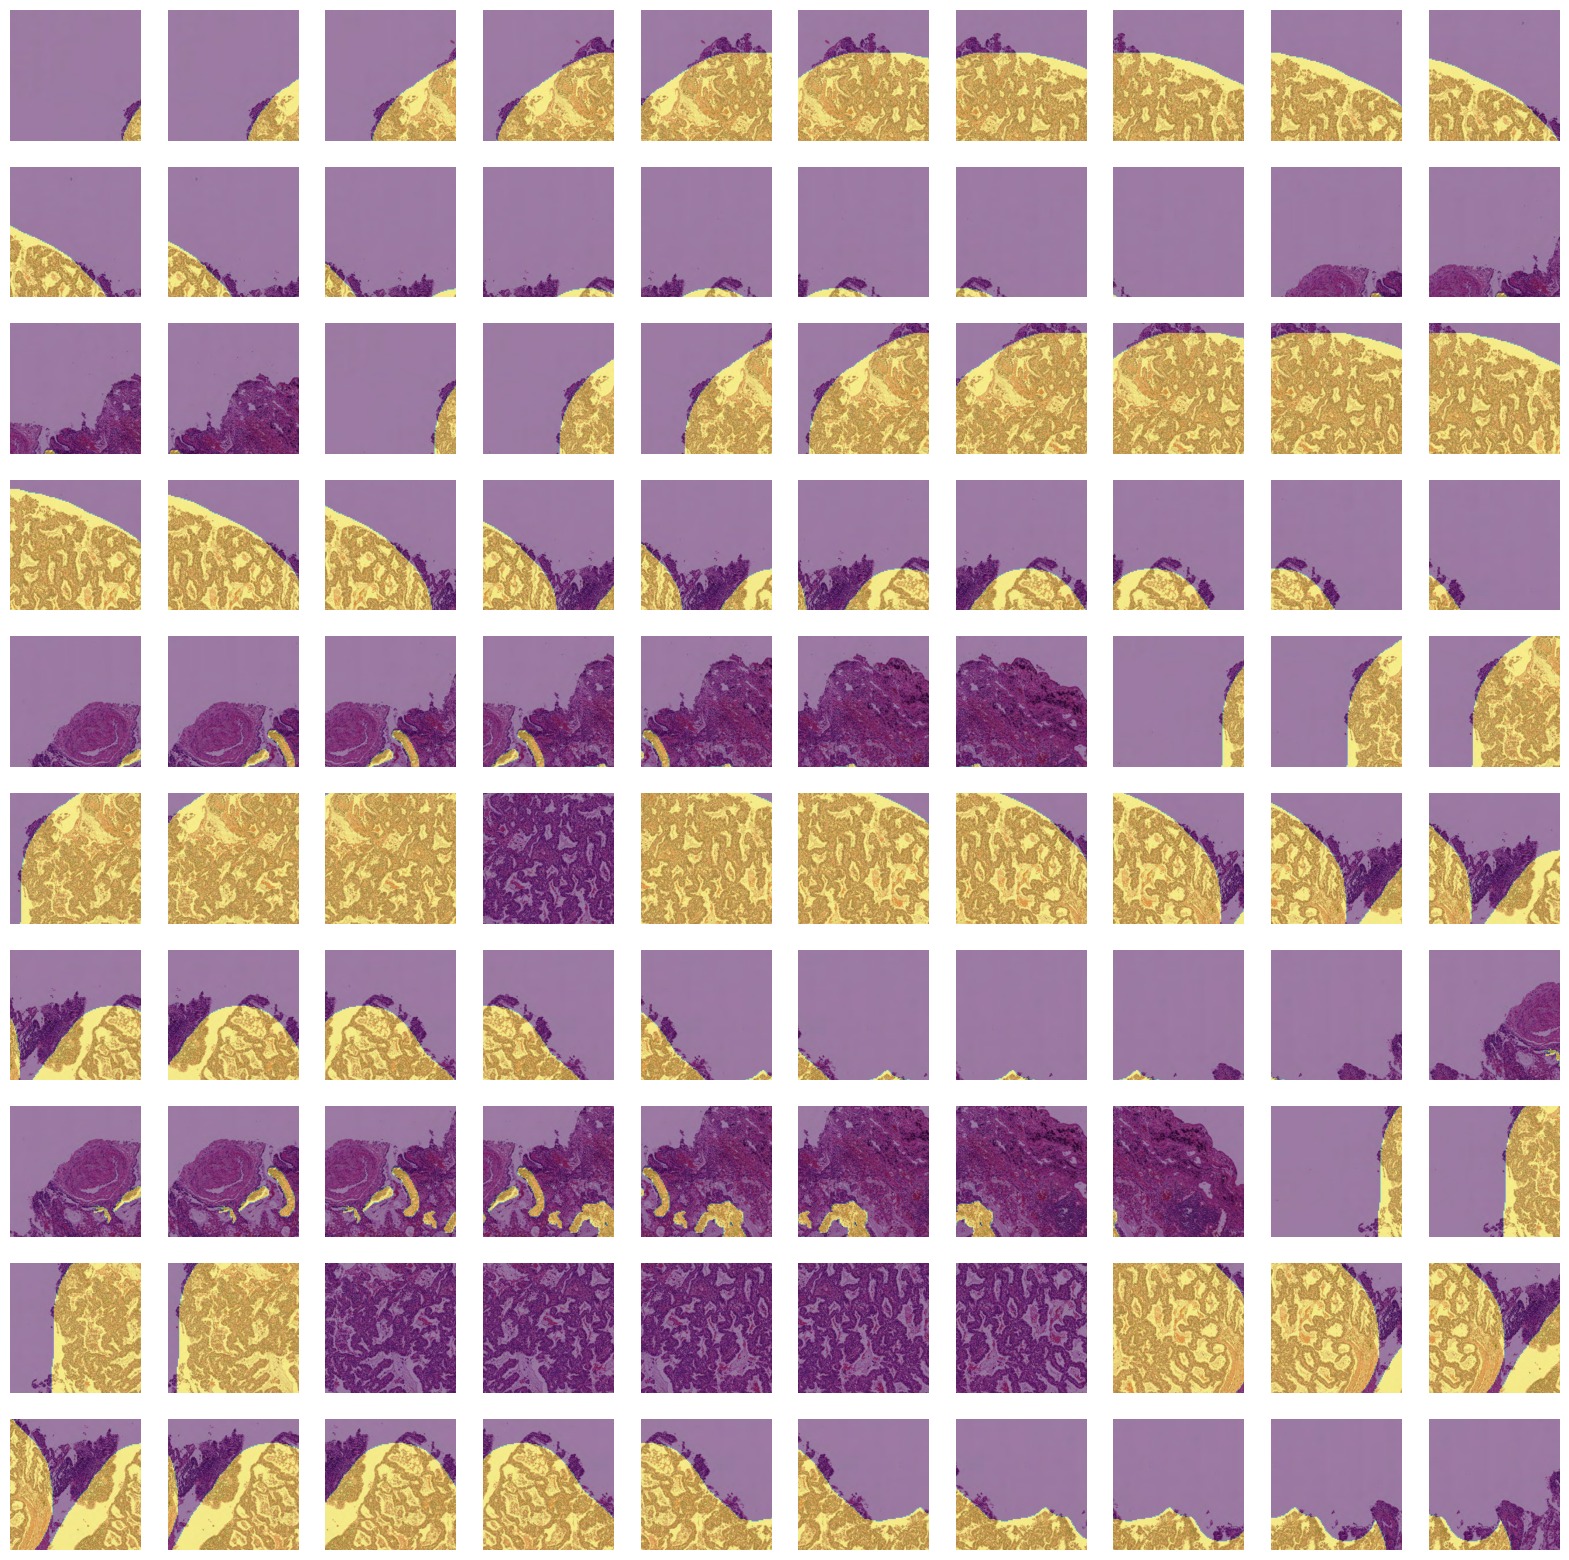

In [5]:
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
for i, (image, mask) in enumerate(images_with_mask):
    ax = axes[i // 10, i % 10]
    ax.imshow(image.astype(np.uint8))
    ax.imshow((mask * 255).astype(np.uint8), alpha=0.5)
    ax.axis("off")
